# Network Analysis Lab

In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

## Graph Input

In [31]:
G = nx.read_edgelist("karate")

The number of nodes and edges:

In [3]:
len(G.nodes())

34

In [4]:
len(G.edges())

78

The nodes and in the graph can be accessed via:

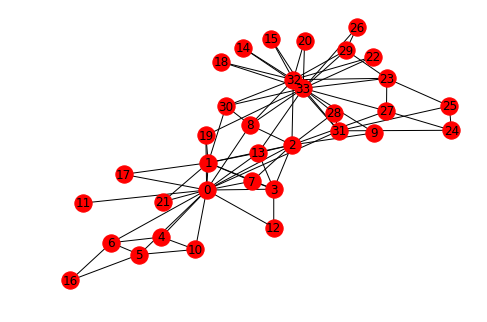

In [5]:
Adj = nx.adjacency_matrix(G)
nx.draw(G, with_labels=True)
plt.show()

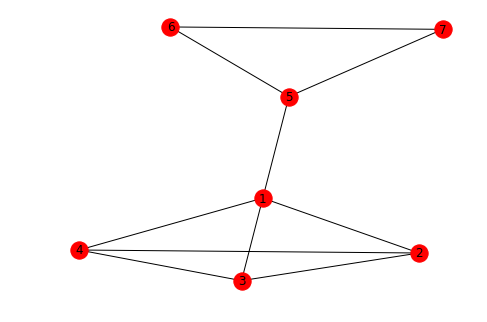

In [44]:
N=2
Gg=nx.Graph()
Gg.add_node(1)
Gg.add_node(2)
Gg.add_node(3)
Gg.add_node(4)
Gg.add_node(5)
Gg.add_node(6)
Gg.add_node(7)
# Gg.add_node(8)
Gg.add_edge(1,5)
Gg.add_edge(1,2)
Gg.add_edge(1,3)
Gg.add_edge(1,4)
Gg.add_edge(2,3)
Gg.add_edge(2,4)
Gg.add_edge(4,3)
Gg.add_edge(5,6)
Gg.add_edge(5,7)
# Gg.add_edge(5,8)
Gg.add_edge(7,6)
# Gg.add_edge(8,6)
# Gg.add_edge(7,8)
nx.draw(Gg, with_labels=True)
plt.show()

In [207]:
Adj = nx.adjacency_matrix(Gg)
i = 0
print(Adj)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 5)	1
  (4, 6)	1
  (4, 7)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (7, 4)	1
  (7, 5)	1
  (7, 6)	1


In [110]:
def GetModularity(G, Orig_deg, L):
    New_A = nx.adj_matrix(G)
    New_deg = {}
    New_deg = UpdateDeg(New_A, G.nodes())
    comps = nx.connected_components(G)
    Mod = 0
    for c in comps:
        EWC = 0  
        RE = 0  
        for u in c:
            EWC += New_deg[int(u)]
            RE += Orig_deg[int(u)]
        print(EMC)
        Mod += (float(EWC) - float(RE * RE) / float(2 * L))
    Mod = Mod / float(2 * L)
    return Mod

In [30]:
G = nx.read_edgelist("karate")
Adj = nx.adj_matrix(G)
nb_edges = G.number_of_edges()
degree = Adj.sum(axis=1)
def get_modularity(G,Adj,nb_edges):
    comps = nx.connected_components(G)
    mod = 0
    for com in comps:
        com_list = list(com)
        for i in range(0,len(com_list)):
            for j in range(0,len(com_list)):
                if i!=j:
                    mod += (Adj[(i,j)] - degree[i]*degree[j]/(2*nb_edges)) 
    mod = mod/(2*nb_edges)
    return mod

def girvan_newman(G, Adj, nb_edges):
    G_copy = G.copy()
    max_modularity = get_modularity(G_copy, Adj, nb_edges)
    while True:
        betweenness = nx.edge_betweenness_centrality(G_copy)
        max_bwtweeness = max(betweenness.values())
        for edge, value in betweenness.items():
                if float(value) == max_bwtweeness:
                    G_copy.remove_edge(edge[0], edge[1])
                    break
        modularity = get_modularity(G_copy, Adj, nb_edges)
        if modularity > max_modularity:
            max_modularity = modularity
            G_max = G_copy.copy()
        if G_copy.number_of_edges() == 0:
            break
    print("Max modularity is: ", max_modularity)
    return G_max

cummnity = girvan_newman(G,Adj,nb_edges)

Max modularity is:  [[0.27268245]]


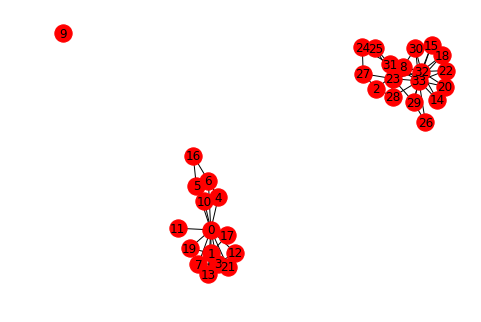

In [27]:
nx.draw(cummnity, with_labels=True)
plt.show()

In [47]:
print(nx.degree_assortativity_coefficient(Gg))
print(nx.betweenness_centrality(Gg))
print(nx.pagerank(Gg))

0.24999999999999556
{1: 0.6, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.5333333333333333, 6: 0.0, 7: 0.0}
{1: 0.18631465607228592, 2: 0.1408149143855476, 3: 0.1408149143855476, 4: 0.1408149143855476, 5: 0.15950771221609522, 6: 0.11586644427748799, 7: 0.11586644427748798}


In [128]:
G.nodes()

NodeView(('0', '31', '21', '19', '17', '13', '12', '11', '10', '8', '7', '6', '5', '4', '3', '2', '1', '30', '32', '28', '27', '9', '16', '33', '14', '15', '18', '20', '22', '23', '29', '25', '24', '26'))

In [88]:
G.edges('1')

EdgeDataView([('1', '0'), ('1', '30'), ('1', '21'), ('1', '19'), ('1', '17'), ('1', '13'), ('1', '7'), ('1', '3'), ('1', '2')])

In [199]:
# Find the triangles
def UpdateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)
    B = A.sum(axis=1)
    for i in range(0,n):
        deg_dict[i] = B[(i-1)]
    return deg_dict

def GetModularity(G, Orig_deg, L):
    New_A = nx.adj_matrix(G)
    New_deg = {}
    New_deg = UpdateDeg(New_A, G.nodes())
    comps = nx.connected_components(G)
    Mod = 0
    print("ssssss")
    for c in comps:
        EWC = 0  
        RE = 0 
#         print(c)
        for u in c:
#             print(u)
#             print(New_deg[int(u)-1])
            EWC += New_deg[int(u)-1]
#             print(EWC)
            RE += Orig_deg[int(u)-1]
#             print("sss")
#         print(EWC)
#         print("sss---------------")
        Mod += (float(EWC) - float(RE * RE) / float(2 * L))
        print(Mod)
    Mod = Mod / float(2 * L)
    print("ssssss")
    print(Mod)
    return Mod

def GirvanNewman(G, Orig_deg, L):
    max_modularity = 0.0
    modularity = 0.0
    while True:
        first_ncomp = nx.number_connected_components(G)
        print(first_ncomp)
        ncomp = first_ncomp
        while ncomp <= first_ncomp:
            betweenness = nx.edge_betweenness_centrality(G)
            max_bwtweeness = max(betweenness.values())
            for edge, value in betweenness.items():
                if float(value) == max_bwtweeness:
                    G.remove_edge(edge[0], edge[1])
            ncomp = nx.number_connected_components(G)
        modularity = GetModularity(G, Orig_deg, L)
        if modularity > max_modularity:
            max_modularity = modularity
            Bestcomps = G.copy() # Best Split
        if G.number_of_edges() == 0:
            break
    if max_modularity > 0.0:
        print("Max modularity (Q): %f", max_modularity)
    else:
        print("Max modularity (Q): %f", max_modularity)
    return Bestcomps

In [200]:
Adj = nx.adj_matrix(Gg)
nb_edges = Gg.number_of_edges()
Orig_deg = {}
Orig_deg = UpdateDeg(Adj, Gg.nodes())
# print(Orig_deg)
Gg.remove_edge(1,5)
print("ssssss")
print(GetModularity(Gg, Orig_deg, nb_edges))
# cummnity=GirvanNewman(Gg, Orig_deg, nb_edges)

ssssss
ssssss
5.5
11.0
ssssss
0.4230769230769231
0.4230769230769231


In [8]:
print(nx.diameter(G, e=None))
print(nx.average_shortest_path_length(G, weight=None))
print(nx.pagerank(G))

5
2.408199643493761
{'0': 0.09700181758983707, '31': 0.03715663592267942, '21': 0.014558859774243493, '19': 0.019604416711937297, '17': 0.014558859774243493, '13': 0.029536314977202986, '12': 0.014645186487916191, '11': 0.009564916863537148, '10': 0.021979406974834498, '8': 0.02976533918616703, '7': 0.024490758039509182, '6': 0.02911334166344221, '5': 0.02911334166344221, '4': 0.021979406974834498, '3': 0.03586064322306479, '2': 0.05707842304763674, '1': 0.05287839103742701, '30': 0.02458933653429248, '32': 0.07169213006588289, '28': 0.01957296050943854, '27': 0.025638803528350497, '9': 0.014308950284462801, '16': 0.016785378110253487, '33': 0.10091791674871213, '14': 0.014535161524273827, '15': 0.014535161524273827, '18': 0.014535161524273827, '20': 0.014535161524273827, '22': 0.014535161524273827, '23': 0.03152091531163228, '29': 0.02628726283711208, '25': 0.021005628174745786, '24': 0.021075455001162945, '26': 0.015043395360629756}


We can draw the graph using matplotlib:

In [9]:
G1 = nx.gnp_random_graph(34,0.45)

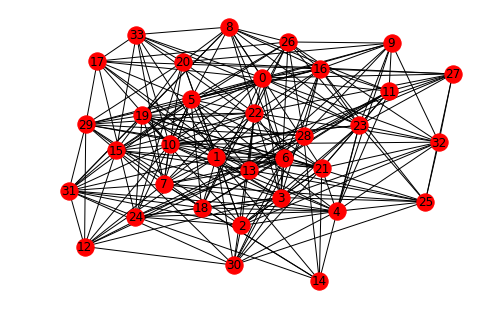

In [10]:
nx.draw(G1, with_labels=True)
plt.show()

In [11]:
len(G1.edges())

236

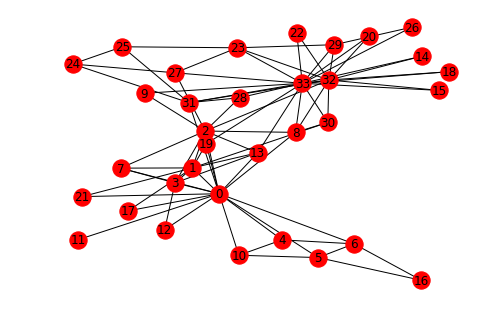

In [12]:
nx.draw(G, with_labels=True)
plt.show()

## Graph Measures

We can get the degree of all the nodes in the graph:

In [13]:
nx.degree(G)

DegreeView({'0': 16, '31': 6, '21': 2, '19': 3, '17': 2, '13': 5, '12': 2, '11': 1, '10': 3, '8': 5, '7': 4, '6': 4, '5': 4, '4': 3, '3': 6, '2': 10, '1': 9, '30': 4, '32': 12, '28': 3, '27': 4, '9': 2, '16': 2, '33': 17, '14': 2, '15': 2, '18': 2, '20': 2, '22': 2, '23': 5, '29': 4, '25': 3, '24': 3, '26': 2})

Or of a single node:

In [14]:
G.degree('24')

3

We can also find the number of and show the connected components of the graph:

In [15]:
nx.number_connected_components(G)

1

In [16]:
list(nx.connected_components(G))

[{'0',
  '1',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '31',
  '32',
  '33',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9'}]

Other possible measures include the clustering coefficient, listing all the shortest paths, the betweenness centrality, or the PageRank measures:

In [17]:
nx.clustering(G)

{'0': 0.15,
 '31': 0.2,
 '21': 1.0,
 '19': 0.3333333333333333,
 '17': 1.0,
 '13': 0.6,
 '12': 1.0,
 '11': 0,
 '10': 0.6666666666666666,
 '8': 0.5,
 '7': 1.0,
 '6': 0.5,
 '5': 0.5,
 '4': 0.6666666666666666,
 '3': 0.6666666666666666,
 '2': 0.24444444444444444,
 '1': 0.3333333333333333,
 '30': 0.5,
 '32': 0.19696969696969696,
 '28': 0.3333333333333333,
 '27': 0.16666666666666666,
 '9': 0,
 '16': 1.0,
 '33': 0.11029411764705882,
 '14': 1.0,
 '15': 1.0,
 '18': 1.0,
 '20': 1.0,
 '22': 1.0,
 '23': 0.4,
 '29': 0.6666666666666666,
 '25': 0.3333333333333333,
 '24': 0.3333333333333333,
 '26': 1.0}

In [18]:
nx.shortest_path(G)

{'0': {'0': ['0'],
  '31': ['0', '31'],
  '21': ['0', '21'],
  '19': ['0', '19'],
  '17': ['0', '17'],
  '13': ['0', '13'],
  '12': ['0', '12'],
  '11': ['0', '11'],
  '10': ['0', '10'],
  '8': ['0', '8'],
  '7': ['0', '7'],
  '6': ['0', '6'],
  '5': ['0', '5'],
  '4': ['0', '4'],
  '3': ['0', '3'],
  '2': ['0', '2'],
  '1': ['0', '1'],
  '24': ['0', '31', '24'],
  '25': ['0', '31', '25'],
  '28': ['0', '31', '28'],
  '33': ['0', '31', '33'],
  '32': ['0', '31', '32'],
  '30': ['0', '8', '30'],
  '16': ['0', '6', '16'],
  '27': ['0', '2', '27'],
  '9': ['0', '2', '9'],
  '23': ['0', '31', '25', '23'],
  '14': ['0', '31', '33', '14'],
  '15': ['0', '31', '33', '15'],
  '18': ['0', '31', '33', '18'],
  '20': ['0', '31', '33', '20'],
  '22': ['0', '31', '33', '22'],
  '26': ['0', '31', '33', '26'],
  '29': ['0', '31', '33', '29']},
 '31': {'31': ['31'],
  '0': ['31', '0'],
  '24': ['31', '24'],
  '25': ['31', '25'],
  '28': ['31', '28'],
  '33': ['31', '33'],
  '32': ['31', '32'],
  '21':

In [19]:
nx.betweenness_centrality(G)

{'0': 0.4376352813852815,
 '31': 0.13827561327561327,
 '21': 0.0,
 '19': 0.03247504810004811,
 '17': 0.0,
 '13': 0.04586339586339585,
 '12': 0.0,
 '11': 0.0,
 '10': 0.0006313131313131313,
 '8': 0.05592682780182781,
 '7': 0.0,
 '6': 0.029987373737373736,
 '5': 0.029987373737373736,
 '4': 0.0006313131313131313,
 '3': 0.011909271284271283,
 '2': 0.14365680615680615,
 '1': 0.05393668831168832,
 '30': 0.014411976911976905,
 '32': 0.14524711399711399,
 '28': 0.0017947330447330447,
 '27': 0.022333453583453587,
 '9': 0.0008477633477633478,
 '16': 0.0,
 '33': 0.3040749759499759,
 '14': 0.0,
 '15': 0.0,
 '18': 0.0,
 '20': 0.0,
 '22': 0.0,
 '23': 0.017613636363636363,
 '29': 0.0029220779220779218,
 '25': 0.0038404882154882162,
 '24': 0.0022095959595959595,
 '26': 0.0}

In [20]:
nx.edge_betweenness_centrality(G)

{('0', '31'): 0.12725999490705375,
 ('0', '21'): 0.04012392835922249,
 ('0', '19'): 0.045936960642843,
 ('0', '17'): 0.04012392835922249,
 ('0', '13'): 0.0423718982542512,
 ('0', '12'): 0.04652406417112298,
 ('0', '11'): 0.058823529411764705,
 ('0', '10'): 0.05228758169934641,
 ('0', '8'): 0.07423959482783016,
 ('0', '7'): 0.0228206434088787,
 ('0', '6'): 0.07813428401663695,
 ('0', '5'): 0.07813428401663695,
 ('0', '4'): 0.05228758169934641,
 ('0', '3'): 0.02049910873440285,
 ('0', '2'): 0.07778768072885718,
 ('0', '1'): 0.02525252525252525,
 ('31', '24'): 0.040106951871657755,
 ('31', '25'): 0.04205783323430382,
 ('31', '28'): 0.0148544266191325,
 ('31', '33'): 0.053393882805647525,
 ('31', '32'): 0.041433947316300256,
 ('21', '1'): 0.018699601052542227,
 ('19', '1'): 0.014633732280791106,
 ('19', '33'): 0.0593823387941035,
 ('17', '1'): 0.018699601052542227,
 ('13', '1'): 0.01240556828792123,
 ('13', '2'): 0.007630931160342924,
 ('13', '3'): 0.01492233256939139,
 ('13', '33'): 0.067

In [21]:
nx.pagerank(G)

{'0': 0.09700181758983707,
 '31': 0.03715663592267942,
 '21': 0.014558859774243493,
 '19': 0.019604416711937297,
 '17': 0.014558859774243493,
 '13': 0.029536314977202986,
 '12': 0.014645186487916191,
 '11': 0.009564916863537148,
 '10': 0.021979406974834498,
 '8': 0.02976533918616703,
 '7': 0.024490758039509182,
 '6': 0.02911334166344221,
 '5': 0.02911334166344221,
 '4': 0.021979406974834498,
 '3': 0.03586064322306479,
 '2': 0.05707842304763674,
 '1': 0.05287839103742701,
 '30': 0.02458933653429248,
 '32': 0.07169213006588289,
 '28': 0.01957296050943854,
 '27': 0.025638803528350497,
 '9': 0.014308950284462801,
 '16': 0.016785378110253487,
 '33': 0.10091791674871213,
 '14': 0.014535161524273827,
 '15': 0.014535161524273827,
 '18': 0.014535161524273827,
 '20': 0.014535161524273827,
 '22': 0.014535161524273827,
 '23': 0.03152091531163228,
 '29': 0.02628726283711208,
 '25': 0.021005628174745786,
 '24': 0.021075455001162945,
 '26': 0.015043395360629756}

## Plotting The Degree Distribution

We can plot the degree distribution of the graph using a histogram:

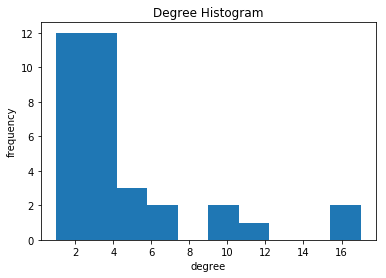

In [22]:
deg_seq = [G.degree(x) for x in nx.nodes(G)]
plt.hist(deg_seq)
plt.title('Degree Histogram')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

In [23]:
float(sum(deg_seq))/float(len(deg_seq))

4.588235294117647

## Modifying the graph

The graph can be modified by removing nodes and/or edges:

In [24]:
G.remove_edge('24','31')

In [25]:
G.remove_node('0')

In [26]:
len(G.nodes())

33

In [27]:
len(G.edges())

61

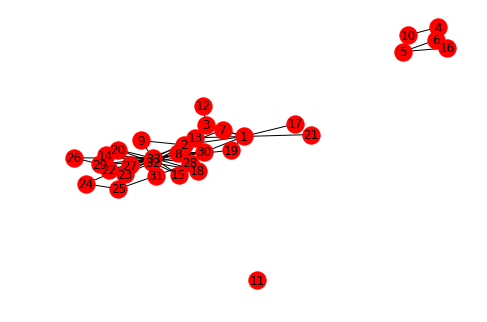

In [28]:
nx.draw(G, with_labels=True)
plt.show()

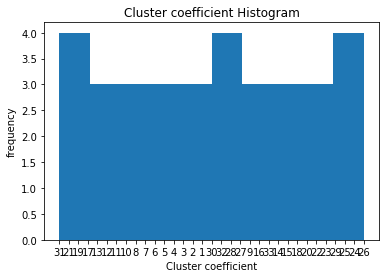

In [29]:
cluster_seq = [x for x in nx.clustering(G)]
plt.hist(cluster_seq)
plt.title('Cluster coefficient Histogram')
plt.xlabel('Cluster coefficient')
plt.ylabel('frequency')
plt.show()

In [10]:
def get_modularity(G,Adj,nb_edges):
    comps = nx.connected_components(G)
    mod = 0
    for com in comps:
        com_list = list(com)
        for i in range(0,len(com_list)):
            for j in range(0,len(com_list)):
                if i!=j:
                    mod += (Adj[(i,j)] - degree[i]*degree[j]/(2*nb_edges)) 
    mod = mod/(2*nb_edges)
    return mod

def girvan_newman(G, Adj, nb_edges):
    G_copy = G.copy()
    max_modularity = get_modularity(G_copy, Adj, nb_edges)
    while True:
        betweenness = nx.edge_betweenness_centrality(G_copy)
        max_bwtweeness = max(betweenness.values())
        for edge, value in betweenness.items():
                if float(value) == max_bwtweeness:
#                     print(edge[0], edge[1])
                    G_copy.remove_edge(edge[0], edge[1])
                    break
        modularity = get_modularity(G_copy, Adj, nb_edges)
        print(modularity)
        if modularity > max_modularity:
            max_modularity = modularity
            G_max = G_copy.copy()
        if G_copy.number_of_edges() == 0:
            break
    print("Max modularity is: ", max_modularity)
    return G_max

In [11]:
Adj = nx.adj_matrix(G)
nb_edges = G.number_of_edges()
degree = Adj.sum(axis=1)
cummnity = girvan_newman(G,Adj,nb_edges)

[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.04980276]]
[[0.23619329]]
[[0.23619329]]
[[0.23619329]]
[[0.27268245]]
[[0.27268245]]
[[0.27268245]]
[[0.27268245]]
[[0.24022025]]
[[0.24022025]]
[[0.24022025]]
[[0.24022025]]
[[0.24022025]]
[[0.24022025]]
[[0.14949047]]
[[0.15310651]]
[[0.15310651]]
[[0.15639382]]
[[0.15639382]]
[[0.1526956]]
[[0.1526956]]
[[0.15466798]]
[[0.15466798]]
[[0.15261341]]
[[0.15261341]]
[[0.15622945]]
[[0.15622945]]
[[0.15253123]]
[[0.15253123]]
[[0.1426693]]
[[0.1426693]]
[[0.13280736]]
[[0.13280736]]
[[0.12557528]]
[[0.12557528]]
[[0.11522025]]
[[0.11522025]]
[[0.10798817]]
[[0.10798817]]
[[0.10708416]]
[[0.10708416]]
[[0.10708416]]
[[0.10618014]]
[[0.09697567]]
[[0.09697567]]
[[0.08859303]]
[[0.08859303]]
[[0.08859303]]
[[0.08021039]]
[[0.08021039]]
[[0.08021039]]
[[0.07330703]]
[[0.07330703]]
[[0.06410256]]
[[0.0591716]]
[[0.0591716]]
[[0.04996713]]
[[0.04996713]]
[

In [14]:
from networkx.algorithms import community
# G = nx.barbell_graph(5, 1)
communities_generator = community.girvan_newman(G)
# top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['0',
  '1',
  '10',
  '11',
  '12',
  '13',
  '16',
  '17',
  '19',
  '21',
  '3',
  '4',
  '5',
  '6',
  '7'],
 ['14',
  '15',
  '18',
  '2',
  '20',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '8',
  '9']]

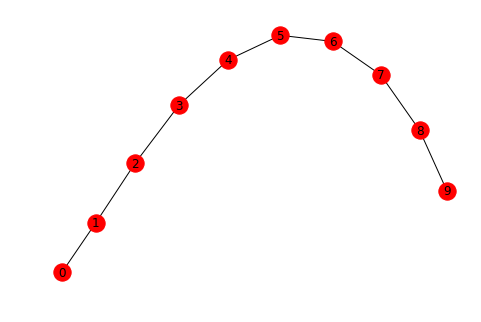

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

In [25]:
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms import community
def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

G = nx.path_graph(10)
comp = community.girvan_newman(G,most_valuable_edge=most_central_edge)
nx.draw(G, with_labels=True)
plt.show()
tuple(sorted(c) for c in next(comp))
comp = community.girvan_newman(G,most_valuable_edge=most_central_edge)
tuple(sorted(c) for c in next(comp))

In [32]:
import itertools
from networkx.algorithms import community
# G = nx.path_graph(8)
k = 9
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 

(['0', '1', '10', '11', '12', '13', '16', '17', '19', '21', '3', '4', '5', '6', '7'], ['14', '15', '18', '2', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '8', '9'])
(['0', '1', '10', '11', '12', '13', '16', '17', '19', '21', '3', '4', '5', '6', '7'], ['14', '15', '18', '2', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '8'], ['9'])
(['0', '1', '11', '12', '13', '17', '19', '21', '3', '7'], ['14', '15', '18', '2', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '8'], ['10', '16', '4', '5', '6'], ['9'])
(['0', '1', '11', '12', '13', '17', '19', '21', '3', '7'], ['2', '24', '25', '27', '28', '31'], ['10', '16', '4', '5', '6'], ['14', '15', '18', '20', '22', '23', '26', '29', '30', '32', '33', '8'], ['9'])
(['0', '1', '12', '13', '17', '19', '21', '3', '7'], ['2', '24', '25', '27', '28', '31'], ['11'], ['10', '16', '4', '5', '6'], ['14', '15', '18', '20', '22', '23', '26', '29', '30', '32', '33'